### Name: Emilly Murugi Njue

## **BUSINESS OVERVIEW**

#### INTRODUCTION
SyriaTel is a telecommunications company facing the challenge of customer churn, which refers to customers discontinuing their services or switching to a competitor. To minimize financial losses and improve customer retention, SyriaTel aims to develop a classifier that can predict whether a customer is likely to churn in the near future. By identifying predictable patterns in customer behavior, SyriaTel can implement targeted strategies to retain valuable customers.

#### BUSINESS PROBLEM
The business problem at hand is to build a classifier capable of predicting whether a customer will "soon" stop doing business with SyriaTel. This binary classification problem is crucial for SyriaTel to proactively address customer churn and reduce its financial impact.

#### OBJECTIVES
1. To identify patterns in customer behavior that indicate a likelihood of churn.
2. To determine the specific factors that contribute to customer churn in the telecommunications industry.
3. To predict which customers are likely to churn in the near future with a high degree of accuracy.
4. To develop a classifier model that assists in predicting customer churn and improving customer retention rates.


In [193]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [194]:

data = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Data Understanding

In [195]:
#Get the column names
print("Column names: ")
print()
print(data.columns)

Column names: 

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


In [196]:
# Get unique count for each variable
data.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [197]:
#Get data types of each column
print("Data types: ")
print()
print(data.dtypes)

Data types: 

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [198]:
# Check for missing values
print("Missing values: ")
print()
print(data.isna().sum())

Missing values: 

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [199]:
#Check for duplicated rows
print("Duplicated rows: ", data.duplicated().sum())

Duplicated rows:  0


##### This dataset has no missing values and duplicates.

In [200]:
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [201]:
#Drop irrelevant columns
data.drop(['phone number', 'account length'], axis=1, inplace=True)
data

,state,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


## Exploratory Data Analysis

#### Print the list of categorical columns


In [202]:
categorical_columns = data.select_dtypes(include=['object', 'bool'])

print("Categorical Columns:")
for column in categorical_columns:
    print(column)


Categorical Columns:
state
international plan
voice mail plan
churn


In [203]:
#Check unique values in the categorical columns
print("Churn Column values: ")
print()
print(data['churn'].value_counts())
print()
print()

print("Voice Mail Plan Column values: ")
print()
print(data['voice mail plan'].value_counts())
print()
print()

print("International Plan Column values: ")
print()
print(data['international plan'].value_counts())


Churn Column values: 

False    2850
True      483
Name: churn, dtype: int64


Voice Mail Plan Column values: 

no     2411
yes     922
Name: voice mail plan, dtype: int64


International Plan Column values: 

no     3010
yes     323
Name: international plan, dtype: int64


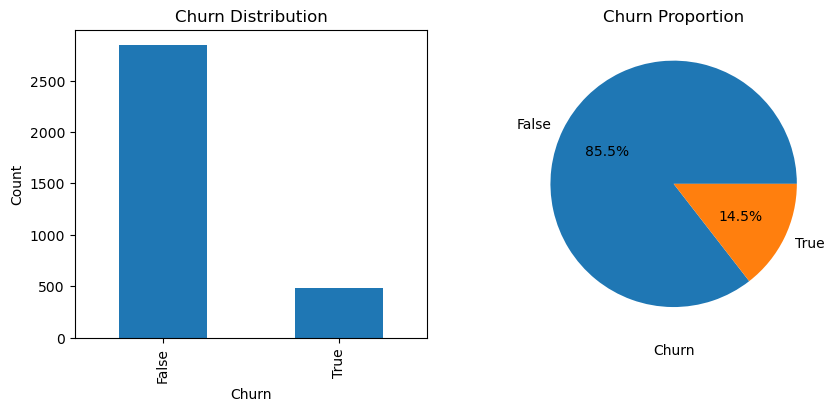

In [204]:
fig, (ax_bar, ax_pie) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

#Bar Chart for churn
churn_counts = data['churn'].value_counts()

churn_counts.plot(kind='bar', ax=ax_bar)
ax_bar.set_xlabel('Churn')
ax_bar.set_ylabel('Count')
ax_bar.set_title('Churn Distribution')

#Pie chart for churn
churn_counts = data['churn'].value_counts()
ax_pie.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%')
ax_pie.set_xlabel('Churn')
ax_pie.set_title('Churn Proportion')

plt.show()


About 15% of the customers have churned.

### Function to visualize the categorical columns

In [205]:
def visualize_column(column):
    column_counts = data[column].value_counts()

    fig, (ax_bar, ax2_bar, ax_pie) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

    # Bar chart
    ax_bar.bar(column_counts.index, column_counts.values)
    ax_bar.set_xlabel(column)
    ax_bar.set_ylabel('Count')
    ax_bar.set_xticks([0, 1])
    ax_bar.set_title(f'Distribution of {column}')

    # Add percentage labels on top of each bar

    # Bar chart for churn vs. column
    grouped_data = data.groupby([column, 'churn']).size().unstack()
    grouped_data.plot(kind='bar', ax=ax2_bar)
    ax2_bar.set_xlabel(column)
    ax2_bar.set_ylabel('Count')
    ax2_bar.set_xticklabels(grouped_data.index, rotation='horizontal')
    ax2_bar.set_title(f'Churn Distribution by {column}')

    # Pie chart
    ax_pie.pie(column_counts.values, labels=column_counts.index, autopct='%1.1f%%')
    ax_pie.set_xlabel(column)
    ax_pie.set_title(f'Proportion of Customers by {column}')

    plt.tight_layout()
    plt.show()

#### 1. International Plan column

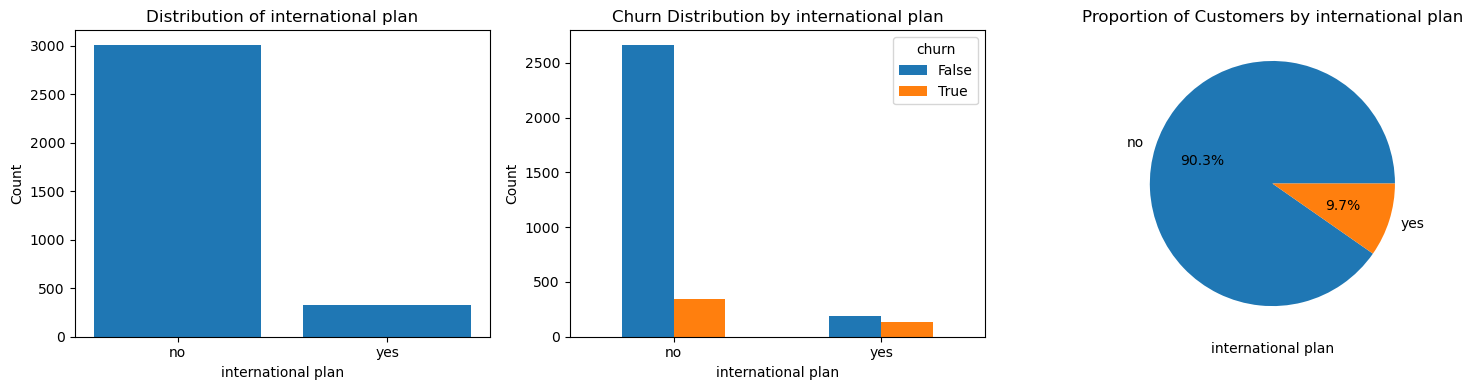

In [206]:
visualize_column('international plan')

#### 
- Customers without the international plan are more (90%) compared to those without the plan (10%).
- On comparing the customer who churned based on whether they had the plan or not, it is seen that those without churn more compared to those with the plan

#### 2. Voice Mail Plan

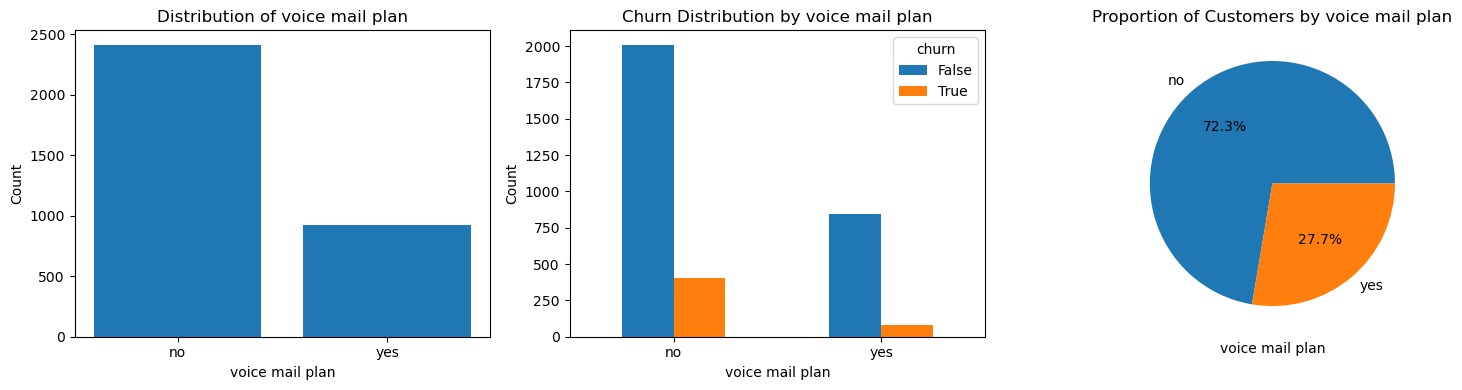

In [207]:
visualize_column('voice mail plan')


#### 
- Few of the customers have subscribed to the voice mail plan (28%).
- It is observed that the customers without the plan churn more compared to the with the voice mail plan.

#### Convert the categorical columns (Churn, Voice mail plan and International plan) to numerical columns using Scikit Learn OrdinalEncoder

In [208]:

from sklearn.preprocessing import OrdinalEncoder

cat_columns = ['international plan', 'voice mail plan', 'churn']

#Instantiate the OrdinalEncoder
encoder = OrdinalEncoder()

#Fit and transform the categorical columns
encoded_data = encoder.fit_transform(data[cat_columns])

# Create a new DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=cat_columns)

# Replace the original categorical columns with the encoded columns in the original DataFrame
data[cat_columns] = encoded_df

data

,state,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,415,0.0,1.0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0.0
1,OH,415,0.0,1.0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0.0
2,NJ,415,0.0,0.0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0.0
3,OH,408,1.0,0.0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0.0
4,OK,415,1.0,0.0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,415,0.0,1.0,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0.0
3329,WV,415,0.0,0.0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0.0
3330,RI,510,0.0,0.0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0.0
3331,CT,510,1.0,0.0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0.0


#### Correlation matrix


In [209]:
corr_matrix = data.corr()
sorted_columns = corr_matrix.abs().sum().sort_values().index
sorted_corr_matrix = corr_matrix.reindex(index=sorted_columns, columns=sorted_columns)
sorted_corr_matrix


,total eve calls,total night calls,area code,total day calls,total intl calls,customer service calls,international plan,number vmail messages,voice mail plan,total night charge,total night minutes,total eve minutes,total eve charge,total intl minutes,total intl charge,total day minutes,total day charge,churn
total eve calls,1.000000,0.007710,-0.011886,0.006462,0.017434,0.002423,0.006114,-0.005864,-0.006444,-0.002056,-0.002093,-0.011430,-0.011423,0.008703,0.008674,0.015769,0.015769,0.009233
total night calls,0.007710,1.000000,0.016522,-0.019557,0.000305,-0.012802,0.012451,0.007123,0.015553,0.011188,0.011204,0.007586,0.007596,-0.013605,-0.013630,0.022972,0.022972,0.006141
area code,-0.011886,0.016522,1.000000,-0.009646,-0.024179,0.027572,0.048551,-0.001994,-0.000747,-0.005845,-0.005825,0.003580,0.003607,-0.018288,-0.018395,-0.008264,-0.008264,0.006174
total day calls,0.006462,-0.019557,-0.009646,1.000000,0.004574,-0.018942,0.003755,-0.009548,-0.011086,0.022927,0.022938,-0.021451,-0.021449,0.021565,0.021666,0.006750,0.006753,0.018459
total intl calls,0.017434,0.000305,-0.024179,0.004574,1.000000,-0.017561,0.017366,0.013957,0.007618,-0.012329,-0.012353,0.002541,0.002541,0.032304,0.032372,0.008033,0.008032,-0.052844
customer service calls,0.002423,-0.012802,0.027572,-0.018942,-0.017561,1.000000,-0.024522,-0.013263,-0.017824,-0.009277,-0.009288,-0.012985,-0.012987,-0.009640,-0.009675,-0.013423,-0.013427,0.208750
international plan,0.006114,0.012451,0.048551,0.003755,0.017366,-0.024522,1.000000,0.008745,0.006006,-0.028913,-0.028905,0.019100,0.019106,0.045871,0.045780,0.049396,0.049398,0.259852
number vmail messages,-0.005864,0.007123,-0.001994,-0.009548,0.013957,-0.013263,0.008745,1.000000,0.956927,0.007663,0.007681,0.017562,0.017578,0.002856,0.002884,0.000778,0.000776,-0.089728
voice mail plan,-0.006444,0.015553,-0.000747,-0.011086,0.007618,-0.017824,0.006006,0.956927,1.000000,0.006064,0.006079,0.021545,0.021559,-0.001318,-0.001276,-0.001684,-0.001686,-0.102148
total night charge,-0.002056,0.011188,-0.005845,0.022927,-0.012329,-0.009277,-0.028913,0.007663,0.006064,1.000000,0.999999,-0.012593,-0.012601,-0.015214,-0.015186,0.004300,0.004301,0.035496


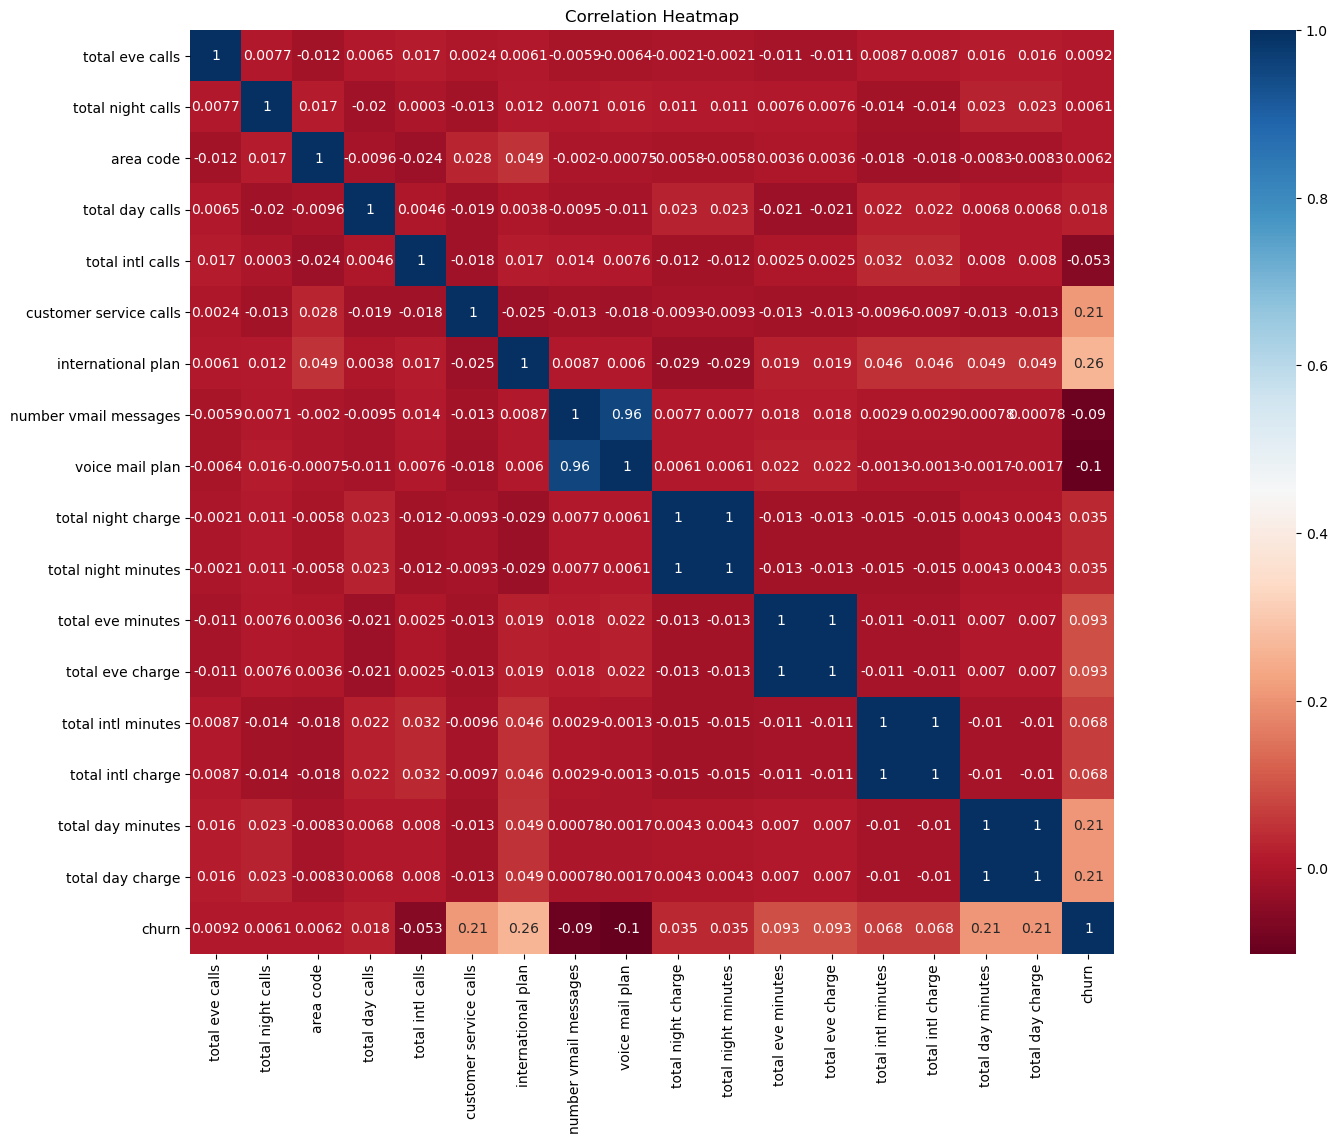

In [210]:
plt.figure(figsize=(35, 12))
sns.heatmap(sorted_corr_matrix, annot=True, cmap='RdBu', square=True)

plt.title('Correlation Heatmap')
plt.show()


In [212]:
data.corrwith(data['churn']).sort_values(ascending=False).to_frame('Churn')

,Churn
churn,1.000000
international plan,0.259852
customer service calls,0.208750
total day minutes,0.205151
total day charge,0.205151
total eve minutes,0.092796
total eve charge,0.092786
total intl charge,0.068259
total intl minutes,0.068239
total night charge,0.035496



- *international plan* has a positive correlation of 0.259852 with churn.

This shows that customers with an international plan are more likely to churn.

- *customer service calls* has a positive correlation of 0.208750 with churn.
 
This shows that customers who make more customer service calls are more likely to churn.

- *total day minutes* and *total day charge* have positive correlations of 0.205151 with churn.
 
This shows that customers with longer daytime call durations and higher charges are more likely to churn.

- *total eve minutes* and *total eve charge* have smaller positive correlations of 0.092796 and 0.092786, respectively.
 
This shows a weaker relationship between evening call durations/charges and churn.

- *total intl charge* and *total intl minutes* have positive correlations of 0.068259 and 0.068239, respectively.

This shows that customers with higher international call charges and durations are slightly more likely to churn.
 
- *total night charge* and *total night minutes* have smaller positive correlations of 0.035496 and 0.035493, respectively.

This shows a weaker relationship between nighttime call durations/charges and churn.

- *Total Day Calls*, *Total Eve Calls*, *Total Night Calls*, and *Total Intl Calls* have weak correlations (around 0.01) with churn, suggesting that the number of calls made during different times of the day has minimal impact on churn.

- *Area Code* has a very weak positive correlation (0.006) with churn. The area code of the customer's location has a negligible effect on churn.

- *Number Vmail Messages* and *Voice Mail Plan* have weak negative correlations with churn (-0.090 and -0.102, respectively). Customers with more voicemail messages and those who have a voicemail plan are slightly less likely to churn.